<a href="https://colab.research.google.com/github/hugueds/tensorflow-course/blob/master/02_RNN_Exercise_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# RNN Exercise

**TASK: IMPORT THE BASIC LIBRARIES YOU THINK YOU WILL USE**

In [155]:
%tensorflow_version 2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf

`%tensorflow_version` only switches the major version: `1.x` or `2.x`.
You set: `2`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


In [0]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping

## Data

Info about this data set: https://fred.stlouisfed.org/series/IPN31152N


Units:  Index 2012=100, Not Seasonally Adjusted

Frequency:  Monthly

The industrial production (IP) index measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.

NAICS = 31152

Source Code: IP.N31152.N

Suggested Citation:
Board of Governors of the Federal Reserve System (US), Industrial Production: Nondurable Goods: Ice cream and frozen dessert [IPN31152N], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/IPN31152N, November 16, 2019.

# Project Tasks

**TASK: Read in the data set "Frozen_Dessert_Production.csv" from the Data folder. Figure out how to set the date to a datetime index columns**

In [0]:
data = pd.read_csv('Frozen_Dessert_Production.csv', parse_dates=True, index_col='DATE')

In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 573 entries, 1972-01-01 to 2019-09-01
Data columns (total 1 columns):
IPN31152N    573 non-null float64
dtypes: float64(1)
memory usage: 9.0 KB


In [159]:
data.tail()

,IPN31152N
DATE,
2019-05-01,114.5613
2019-06-01,124.9605
2019-07-01,110.2632
2019-08-01,102.6085
2019-09-01,101.5866


**Task: Change the column name to Production**

In [0]:
data.columns = ['Production']

In [161]:
data.tail()

,Production
DATE,
2019-05-01,114.5613
2019-06-01,124.9605
2019-07-01,110.2632
2019-08-01,102.6085
2019-09-01,101.5866


**TASK: Plot out the time series**

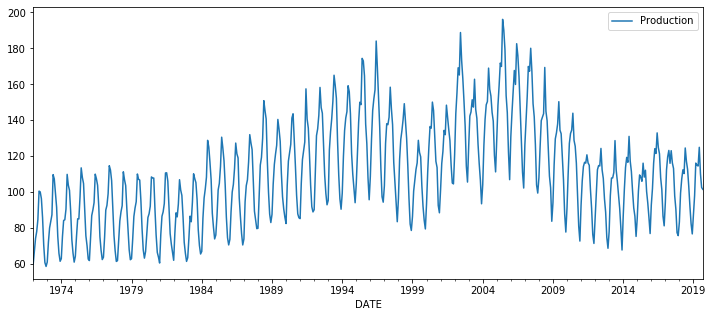

In [162]:
data.plot(figsize=(12,5))

## Train Test Split

**TASK: Figure out the length of the data set**

In [163]:
df = data
len(df)

573

**TASK: Split the data into a train/test split where the test set is the last 24 months of data.**

In [0]:
test_size = 36
test_index = len(df) - test_size

In [0]:
train = df.iloc[:test_index]
test = df.iloc[test_index:]

## Scale Data

**TASK: Use a MinMaxScaler to scale the train and test sets into scaled versions.**

In [166]:
scaler = MinMaxScaler()
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [0]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

# Time Series Generator

**TASK: Create a TimeSeriesGenerator object based off the scaled_train data. The batch length is up to you, but at a minimum it should be at least 18 to capture a full year seasonality.**

In [0]:
length = 12
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)
val_generator = TimeseriesGenerator(scaled_test, scaled_test, length=length, batch_size=1)

### Create the Model

**TASK: Create a Keras Sequential Model with as many LSTM units you want and a final Dense Layer.**

In [0]:
model = Sequential()

In [170]:
model.add(LSTM(128, activation='relu', input_shape=(length, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 128)               66560     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


**TASK: Create a generator for the scaled test/validation set. NOTE: Double check that your batch length makes sense for the size of the test set as mentioned in the RNN Time Series video.**

**TASK: Create an EarlyStopping callback based on val_loss.**

In [0]:
es = EarlyStopping(monitor='val_loss', patience=3)

**TASK: Fit the model to the generator, let the EarlyStopping dictate the amount of epochs, so feel free to set the parameter high.**

In [172]:
model.fit_generator(generator, epochs=20, validation_data=val_generator, callbacks=[es])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 525 steps, validate for 24 steps
Epoch 1/20
525/525 [==============================] - 6s 11ms/step - loss: 0.0219 - val_loss: 0.0140
Epoch 2/20
525/525 [==============================] - 4s 8ms/step - loss: 0.0084 - val_loss: 0.0020
Epoch 3/20
525/525 [==============================] - 4s 8ms/step - loss: 0.0057 - val_loss: 0.0019
Epoch 4/20
525/525 [==============================] - 4s 8ms/step - loss: 0.0050 - val_loss: 0.0016
Epoch 5/20
525/525 [==============================] - 4s 9ms/step - loss: 0.0048 - val_loss: 0.0031
Epoch 6/20
525/525 [==============================] - 4s 8ms/step - loss: 0.0041 - val_loss: 0.0019
Epoch 7/20
525/525 [==============================] - 4s 8ms/step - loss: 0.0039 - val_loss: 0.0020


**TASK: Plot the history of the loss that occured during training.**

In [0]:
loss = pd.DataFrame(model.history.history)

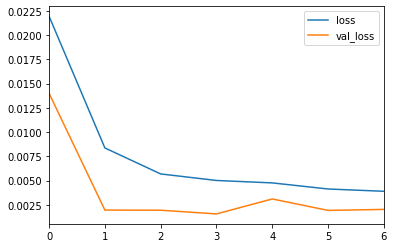

In [174]:
loss.plot()

## Evaluate on Test Data

**TASK: Forecast predictions for your test data range (the last 12 months of the entire dataset). Remember to inverse your scaling transformations. Your final result should be a DataFrame with two columns, the true test values and the predictions.**

In [0]:
test_pred = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length, n_features))

for i in range(len(test)):

  current_pred = model.predict(current_batch)[0]
  test_pred.append(current_pred)
  current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)

In [0]:
true_p = scaler.inverse_transform(test_pred)

In [177]:
test['predicted'] = true_p

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [178]:
test[:-10]

,Production,predicted
DATE,,
2016-10-01,101.3836,88.834514
2016-11-01,86.6647,79.308996
2016-12-01,81.2569,75.444387
2017-01-01,94.2454,83.922785
2017-02-01,112.3879,95.254637
2017-03-01,119.6982,106.509870
2017-04-01,123.2282,114.669252
2017-05-01,116.0635,121.119302
2017-06-01,123.0870,125.070917


**TASK: Plot your predictions versus the True test values. (Your plot may look different than ours).**

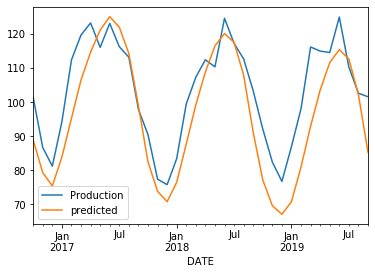

In [179]:
test.plot()

**TASK: Calculate your RMSE.**

In [0]:
from sklearn.metrics import mean_squared_error

In [181]:
mse = mean_squared_error(test['Production'], test['predicted'])
mse

100.66165671720925

In [182]:
rmse = np.sqrt(rmse)
rmse

10.033028292455336

In [183]:
df.describe()

,Production
count,573.000000
mean,109.895545
std,27.950571
min,58.659800
25%,88.935500
50%,107.643000
75%,128.277700
max,196.173700


In [0]:
forecast = []
amount = 50

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length, n_features))

for i in range((amount)):

  current_pred = model.predict(current_batch)[0]
  forecast.append(current_pred)
  current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)

In [0]:
forecast = scaler.inverse_transform(forecast)

In [0]:
forecast_df = pd.DataFrame(forecast)

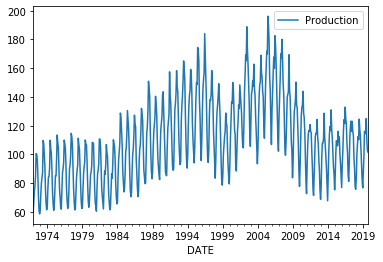

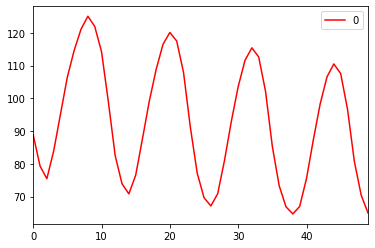

In [246]:
df.plot()
forecast_df.plot(color='red')

In [247]:
forecast_df.index = pd.to_datetime(forecast_df.index, origin=pd.Timestamp('2019-10-01'), unit='M').date

/usr/local/lib/python3.6/dist-packages/pandas/core/tools/datetimes.py:551: FutureWarning: M and Y units are deprecated and will be removed in a future version.
  offset = offset // tslibs.Timedelta(1, unit=unit)


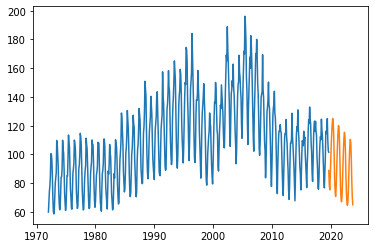

In [248]:
plt.plot(df)
plt.plot(forecast_df)